# Solution of a PDE system using Finite Differences' Method

$$\frac{\partial u}{\partial t}=\bigtriangledown^2 u - \beta \bigtriangledown.[u\vec{x}_uq],$$

$$\frac{\partial v}{\partial v}=\bigtriangledown^2 v - \beta \bigtriangledown.[v\vec{x}_vp],$$

$$\frac{\partial p}{\partial t}=u(1+mq)-p,$$

$$\frac{\partial q}{\partial t}=v(1+mp)-q,$$

Where

$u$: function for Home Range of individual u

$v$: function for Home Range of individual v

$p$: function for marks of individual u

$q$: function for marks of individual v

$\beta$: Advection-Difussion coeficients ratio

$\vec{x}_u$: Unit vector biased to Home range center of individual u

$\vec{x}_v$: Unit vector biased to Home range center of individual v

$m$: sensitivity of individual to foreing marks

(Moorcroft & Lewis 2004)

In [3]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## 1. Establishing the grid and some variables

In [43]:
# Grid

nx = 41
ny = 41
nt = 22
beta = 0.5
sigma = 0.05 # Counrat number
dx = (200 - 0) / (nx - 1)
dy = (200 - 0) / (ny - 1)
dt = sigma * dx * dy / (beta) # Courant–Friedrichs–Lewy condition

m = 1

x = np.linspace(-100, 100, nx)
y = np.linspace(-100, 100, ny)

# Setting 7 Individuals with initial conditions of probability equal to zero for whole grid
u1 = np.zeros((ny, nx))*0.1
un1 = np.zeros((ny, nx))*0.1

u2 = np.zeros((ny, nx))*0.1
un2 = np.zeros((ny, nx))*0.1

# Setting the marks of the individuals with initial conditions for whole grid
p1 = np.zeros((ny, nx))*0.1
pn1 = np.zeros((ny, nx))*0.1

p2 = np.zeros((ny, nx))*0.1
pn2 = np.zeros((ny, nx))*0.1

# Setting inital conditions of the home range for each individual
u1[20:30, 20:30] = 1

u2[10:20, 10:20] = 1

# Setting inital conditions of marks in the home ranges of each individual
p1[20:30, 20:30] = 1

p2[10:20, 10:20] = 1

# Setting center of home range in 0,0
xu1 = x + np.abs(x[25]) + 1
yu1 = y + np.abs(y[25]) + 1 

xu2 = x - np.abs(x[15]) + 1
yu2 = y - np.abs(y[15]) + 1

## 2. Plot the individual with initial conditions

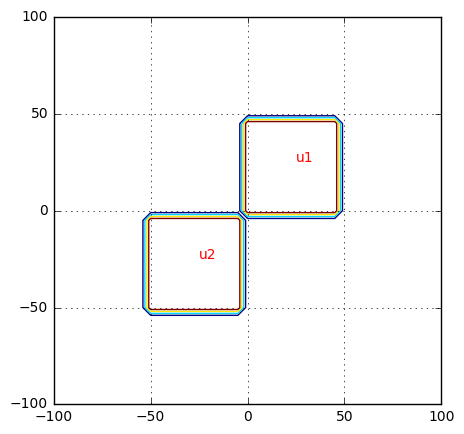

In [44]:
plt.figure(figsize=(5, 5), dpi=100)
X, Y = np.meshgrid(x, y)
CS_u1 = plt.contour(X, Y, u1, 5)
CS_u2 = plt.contour(X, Y, u2, 5)

plt.text(x[25], y[25], 'u1', color='red')
plt.text(x[15], y[15], 'u2', color='red')
plt.grid(True)

## 3. Discretizing

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$
given:
$$\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$$
we can get a discret form as:
$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0$$
and solving we have:
$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$


With the above we can discretize the Diffusion and Advection Equations

-Advection
$$\nabla.[\vec x u p] = \nabla\vec x. \nabla u. \nabla p$$

$$ \bigtriangledown u = \frac{u^{n+1}_{i, j} - u^{n}_{i, j}}{\Delta t} + \frac{u^{n}_{i+1,j} - u^{n}_{i,j}}{\Delta x} + \frac{u^{n}_{i,j+1} - u^{n}_{i,j}}{\Delta y} = 0$$
$$u^{n+1}_{i,j}= u^{n}_{i,j} - \frac{\Delta t}{\Delta x}(u^{n}_{i+1,j} - u^{n}_{i,j}) - \frac{\Delta t}{\Delta y}(u^{n}_{i,j+1} - u^{n}_{i,j})$$
$$u^{n+1}_{i,j}= u^{n}_{i,j} - \frac{\Delta t}{\Delta x}(u^{n}_{i,j} - u^{n}_{i-1,j}) - \frac{\Delta t}{\Delta y}(u^{n}_{i,j} - u^{n}_{i,j-1})$$

for $\vec x$

Unit vector must follow

$$\vec x = \frac{x_i + y_j}{\sqrt{x^2_i + y^2_j}}$$
$$\nabla \vec x = \frac{\partial \vec x}{\partial x} + \frac{\partial \vec x}{\partial y}$$
$$\frac{\partial \vec x}{\partial x} = \frac{(x_i + y_j)'(\sqrt{x^2_i + y^2_i}) - (x_i + y_j)(\sqrt{x^2_i + y^2_i})'}{(\sqrt{x^2_i + y^2_i})^2}$$
$$\frac{\partial \vec x}{\partial x} = \frac{y^2_j - y_j x_i}{\sqrt{x^2_i + y^2_j}(x^2_i + y^2_j)}$$

and

$$\frac{\partial \vec x}{\partial y} = \frac{x^2_i - x_i y_j}{\sqrt{x^2_i + y^2_j}(x^2_i + y^2_j)}$$

For marks
$$\nabla p = u(1+mq)-p$$

-Difussion
$$\bigtriangledown^2 u = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}$$
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}$$
$$\frac{u^{n+1}_{i,j} - u^n_{i,j}}{\Delta t} = \frac{u^n_{i+1,j} - 2 u^n_{i,j} + u^n_{i-1,j}}{\Delta x^2} + \frac{u^n_{i,j+1} - 2 u^n_{i,j} + u^n_{i,j-1}}{\Delta y^2}$$
$$u^{n+1}_{i,j} = u^n_{i,j} + \frac{\Delta t}{\Delta x^2}(u^n_{i+1,j} - 2 u^n_{i,j} + u^n_{i-1,j}) + \frac{\Delta t}{\Delta y^2}(u^n_{i,j+1} - 2 u^n_{i,j} + u^n_{i,j-1})$$


## Implementing the function

In [27]:
for n in range(nt + 1):
    un1 = u1.copy() # Copies are temporal matrix which hold our data in each step of the iterations
    un2 = u2.copy()
    
    pn1 = p1.copy()
    pn2 = p2.copy()
    
    xu1n = -1*xu1.copy() # multiply bi -1 for change to negative sense, it means to point to center of home range
    yu1n = -1*yu1.copy()
    
    xu2n = -1*xu2.copy()
    yu2n = -1*yu2.copy()
      
    u1[1:-1, 1:-1] = un1[1:-1, 1:-1] - beta\
                                     * xu1n[1:-1]/(np.sqrt(xu1n[1:-1]**2 + yu1n[1:-1]**2))\
                                     * dt/dx*(un1[1:-1,1:-1] - un1[1:-1, 0:-2])\
                                     * dt/dx*(pn1[1:-1, 1:-1] - pn1[1:-1, 0:-2])\
                                     - beta\
                                     * yu1n[1:-1]/(np.sqrt(xu1n[1:-1]**2 + yu1n[1:-1]**2))\
                                     * dt/dy*(un1[1:-1,1:-1] - un1[0:-2, 1:-1])\
                                     * dt/dx*(pn2[1:-1, 1:-1] - pn2[0:-2, 1:-1])\
                                     + dt/dx**2*(un1[1:-1,2:] - 2*un1[1:-1,1:-1] + un1[1:-1, 0:-2])\
                                     + dt/dy**2*(un1[2:,1:-1] - 2*un1[1:-1,1:-1] + un1[0:-2, 1:-1])   
    
    u2[1:-1, 1:-1] = un2[1:-1, 1:-1] - beta\
                                     * xu2n[1:-1]/(np.sqrt(xu2n[1:-1]**2 + yu2n[1:-1]**2))\
                                     * dt/dx*(un2[1:-1,1:-1] - un2[1:-1, 0:-2])\
                                     * dt/dx*(pn1[1:-1,1:-1] - pn1[1:-1, 0:-2])\
                                     - beta\
                                     * yu2n[1:-1]/(np.sqrt(xu2n[1:-1]**2 + yu2n[1:-1]**2))\
                                     * dt/dy*(un2[1:-1,1:-1] - un2[0:-2, 1:-1])\
                                     * dt/dx*(pn2[1:-1,1:-1] - pn2[0:-2, 1:-1])\
                                     + dt/dx**2*(un2[1:-1,2:] - 2*un2[1:-1,1:-1] + un2[1:-1, 0:-2])\
                                     + dt/dy**2*(un2[2:,1:-1] - 2*un2[1:-1,1:-1] + un2[0:-2, 1:-1])
    
    p1[1:-1, 1:-1] = un1[1:-1, 1:-1]*(1 + m*(pn2[1:-1, 1:-1])) - pn1[1:-1, 1:-1]

    p2[1:-1, 1:-1] = un2[1:-1, 1:-1]*(1 + m*(pn1[1:-1, 1:-1])) - pn2[1:-1, 1:-1]
    
    u1[0, :] = 0
    u1[-1, :] = 0
    u1[:, 0] = 0
    u1[:, -1] = 0
    
    u2[0, :] = 0
    u2[-1, :] = 0
    u2[:, 0] = 0
    u2[:, -1] = 0
                                                                            
    p1[0, :] = 0
    p1[-1, :] = 0
    p1[:, 0] = 0
    p1[:, -1] = 0
    
    p2[0, :] = 0
    p2[-1, :] = 0
    p2[:, 0] = 0
    p2[:, -1] = 0

## Plotting the results

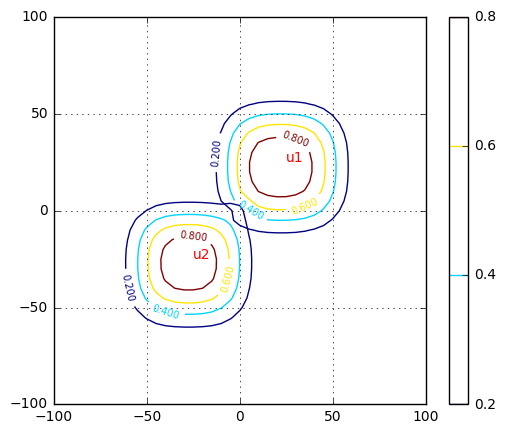

In [39]:
plt.figure(figsize=(6, 5), dpi=100)
X, Y = np.meshgrid(x, y)
CS_u1 = plt.contour(X, Y, u1, 5)
CS_u2 = plt.contour(X, Y, u2, 5)

plt.colorbar()
plt.clabel(CS_u1, inline=1, fontsize=7)
plt.clabel(CS_u2, inline=1, fontsize=7)

plt.text(x[25], y[25], 'u1', color='red')
plt.text(x[15], y[15], 'u2', color='red')

plt.grid(True)

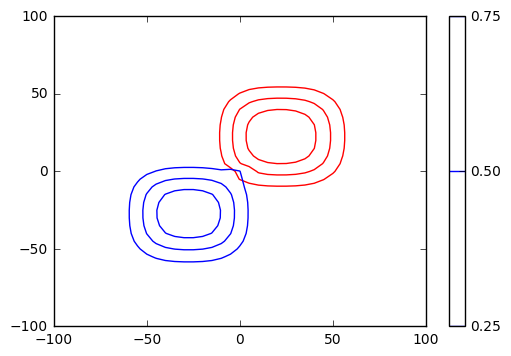

In [41]:
CS_u1 = plt.contour(X, Y, u1, 3, colors='red')
CS_u2 = plt.contour(X, Y, u2, 3, colors='blue')
plt.colorbar()

### Plotting vectors

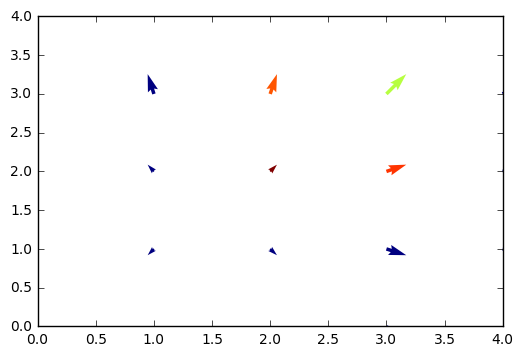

In [37]:
## For individual u1
XU1, YU1 = np.meshgrid(xu1, yu1)
XU2, YU2 = np.meshgrid(xu2, yu2)
plt.quiver(XU1[::10, ::10], YU1[::10, ::10],u1[::10, ::10])
plt.grid(False)

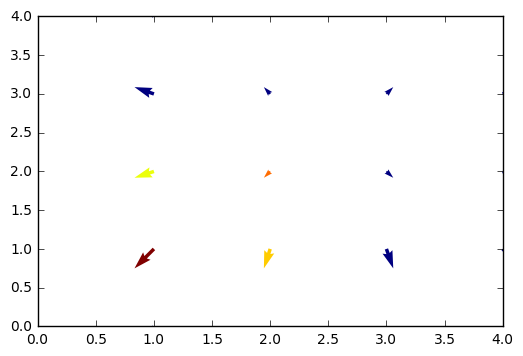

In [38]:
# for individual 2
plt.quiver(XU2[::10, ::10], YU2[::10, ::10],u2[::10, ::10])